<a href="https://colab.research.google.com/github/dacenish/Deep-Learning/blob/main/Graduate_Admission_Prediction_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
filepath = '/content/drive/MyDrive/Deep Learning/Datasets/Admission_Predict_Ver1.1.csv'
df = pd.read_csv(filepath)

In [115]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [116]:
df.shape

(500, 9)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [118]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [119]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool>

In [120]:
df.drop(columns=['Serial No.'], inplace=True)

In [121]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [122]:
# X = df.drop(columns=['Chance of Admit '])
# y = df['Chance of Admit ']

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [123]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [124]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [126]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [127]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [128]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

In [129]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [131]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2 )

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 0.5267 - val_loss: 0.5487
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4660 - val_loss: 0.4882
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4166 - val_loss: 0.4358
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3716 - val_loss: 0.3870
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3291 - val_loss: 0.3406
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2882 - val_loss: 0.2964
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2494 - val_loss: 0.2544
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2123 - val_loss: 0.2152
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1778 - val_loss: 0.1789
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1463 - val_loss: 0.1460
Epoch 11

In [132]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [133]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)


0.7333682693910784

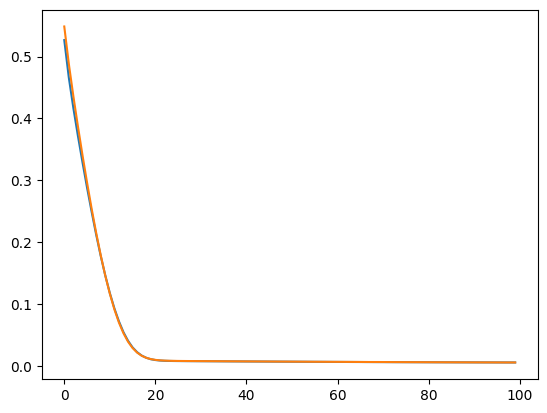

In [134]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])